# 1900-2016 metų Pasaulio natūralių katastrofų analizė

Duomenys paimti iš www.kaggle.com.

![](https://lh3.googleusercontent.com/proxy/Nt_O3YUlf-FsOcr53WILoGi9K9S-hESJycL97PMmmiHDpA_h8Aw1vnUWxiWz0oBXYONvpI30wFNGFs-GO3Q4Oc_KB-66Hic)

![](https://lh3.googleusercontent.com/proxy/kRiFhW3cd_usqk-mErtT2eTJwTnfano6AeFAsuQAwbxVvFLgbu9IsoNjdAlszvN_AX-5iNQS-TDR1LsIUFvtwftuqLx0nZ8)

## Duomenų paketo sandara


25 stulpeliai ir apie 14 tūkstančių eilučių.


Duomenys apie šešių rūšių katastrofas, išskaidytas ir paanalizuotas detaliau.

## Iškeltos hipotezės

    1) Daugiausiai natūralių katastrofų įvyksta Azijos kontinente.
    2) JAV yra katastrofų "karalienė".
    3) Vulkaninis aktyvumas tiesiogiai susijęs su žemės drebėjimais.
    4) Biologinės katastrofos vidutiniškai pareikalauja daugiausiai žmonių aukų.
    5) Ilgiau nei metus trunkančios ir mirtingiausios sausros daugiausiai įvyksta Afrikos kontinente.
    6) Natūralios katastrofos mažiausiai paveikia Europos kontinento gyventojus.
    7) Bėgant metams katastrofos dažnėja.   

In [70]:
import pandas as pd
import numpy as np
import mysql.connector
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [71]:
mydb = mysql.connector.connect(
    host="localhost",
    port="3317",
    user="root",
    password="KarlMalone1821?"
)
cursor = mydb.cursor()
cursor.execute('USE natural_disasters')
natural_disasters = pd.read_sql('SELECT * FROM natural_disasters', con=mydb)
natural_disasters.head(5)

,ï»¿Year,Disaster_Subgroup,Disaster_Type,Disaster_Subtype,Disaster_Subsubtype,Event_Name,Country,ISO,Region,Continent,...,End_Year,End_Month,Total_Deaths,No_Injured,No_Affected,No_Homeless,Total_Affected,Insured_Damages,Total_Damages,CPI
0,1900,Climatological,Drought,Drought,,,Cabo Verde,CPV,Western Africa,Africa,...,1900,,11000,,,,,,,3.221647271
1,1900,Climatological,Drought,Drought,,,India,IND,Southern Asia,Asia,...,1900,,1250000,,,,,,,3.221647271
2,1902,Geophysical,Earthquake,Ground movement,,,Guatemala,GTM,Central America,Americas,...,1902,4,2000,,,,,,25000,3.350513162
3,1902,Geophysical,Volcanic activity,Ash fall,,Santa Maria,Guatemala,GTM,Central America,Americas,...,1902,4,1000,,,,,,,3.350513162
4,1902,Geophysical,Volcanic activity,Ash fall,,Santa Maria,Guatemala,GTM,Central America,Americas,...,1902,10,6000,,,,,,,3.350513162


In [72]:
natural_disasters.rename(columns={'ï»¿Year': 'Year'}, inplace=True)

In [73]:
natural_disasters=natural_disasters.drop(['Disaster_Subsubtype', 'ISO', 'Aid_Contribution',
                                           'Start_Month', 'End_Month', 'Insured_Damages',
                                           'Total_Damages', 'CPI'],axis=1)

In [74]:
natural_disasters.head(3)

,Year,Disaster_Subgroup,Disaster_Type,Disaster_Subtype,Event_Name,Country,Region,Continent,Location,Origin,Start_Year,End_Year,Total_Deaths,No_Injured,No_Affected,No_Homeless,Total_Affected
0,1900,Climatological,Drought,Drought,,Cabo Verde,Western Africa,Africa,Countrywide,,1900,1900,11000,,,,
1,1900,Climatological,Drought,Drought,,India,Southern Asia,Asia,Bengal,,1900,1900,1250000,,,,
2,1902,Geophysical,Earthquake,Ground movement,,Guatemala,Central America,Americas,"Quezaltenango, San Marcos",,1902,1902,2000,,,,


In [75]:
natural_disasters.to_csv('C:\\Users\\Tomas\\natural_disasters_for_tableau.csv')

### Daugiausiai natūralių katastrofų įvyksta Azijos kontinente

In [76]:
nd1 = natural_disasters

In [77]:
nd1 = nd1.groupby('Continent')['Continent'].count().sort_values(ascending=False)

In [78]:
print(nd1)

Continent
Asia        5564
Americas    3476
Africa      2555
Europe      1738
Oceania      640
Name: Continent, dtype: int64


In [79]:
print((5564*100/nd1.sum()).round(decimals=1))

39.8


AxesSubplot(0.125,0.125;0.775x0.755)


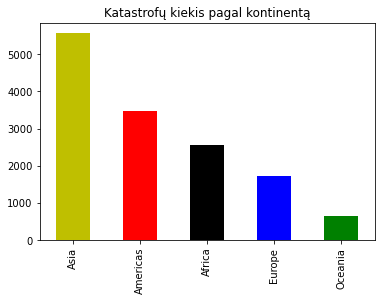

In [80]:
print(nd1.plot.bar(x='Continent', y=['nd1'], title='Katastrofų kiekis pagal kontinentą', 
                   xlabel='', color=['y', 'r', 'k', 'b', 'g']))

### JAV yra katastrofų ,,karalienė''

In [81]:
nd2 = natural_disasters

In [82]:
nd2.head(3)

,Year,Disaster_Subgroup,Disaster_Type,Disaster_Subtype,Event_Name,Country,Region,Continent,Location,Origin,Start_Year,End_Year,Total_Deaths,No_Injured,No_Affected,No_Homeless,Total_Affected
0,1900,Climatological,Drought,Drought,,Cabo Verde,Western Africa,Africa,Countrywide,,1900,1900,11000,,,,
1,1900,Climatological,Drought,Drought,,India,Southern Asia,Asia,Bengal,,1900,1900,1250000,,,,
2,1902,Geophysical,Earthquake,Ground movement,,Guatemala,Central America,Americas,"Quezaltenango, San Marcos",,1902,1902,2000,,,,


In [83]:
nd2 = nd2.groupby('Country')['Country'].count().sort_values(ascending=False)


In [84]:
print(nd2.head(5))

Country
United States of America (the)    960
China                             859
India                             669
Philippines (the)                 594
Indonesia                         468
Name: Country, dtype: int64


In [85]:
print((nd2.head(5).sum()*100/nd2.sum()).round(decimals=1))

25.4


AxesSubplot(0.260833,0.125;0.503333x0.755)


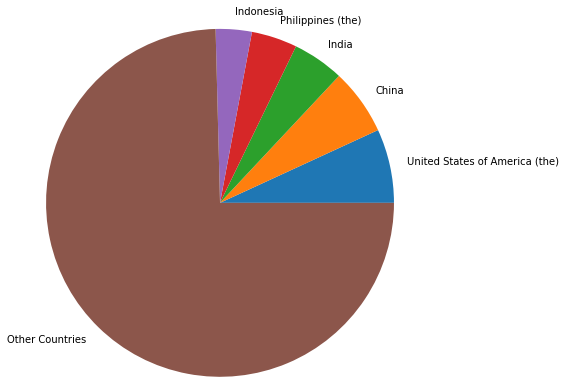

In [86]:
nd22 = nd2.head(5)
if len(nd2) > 5:
    nd22['Other Countries'.format(len(nd2) - 5)] = sum(nd2[5:])
print(nd22.plot(kind='pie', ylabel='', radius = 2))

### Vulkaninis aktyvumas tiesiogiai susijęs su žemės drebėjimais

In [87]:
nd3 = natural_disasters

In [88]:
nd3.head(3)

,Year,Disaster_Subgroup,Disaster_Type,Disaster_Subtype,Event_Name,Country,Region,Continent,Location,Origin,Start_Year,End_Year,Total_Deaths,No_Injured,No_Affected,No_Homeless,Total_Affected
0,1900,Climatological,Drought,Drought,,Cabo Verde,Western Africa,Africa,Countrywide,,1900,1900,11000,,,,
1,1900,Climatological,Drought,Drought,,India,Southern Asia,Asia,Bengal,,1900,1900,1250000,,,,
2,1902,Geophysical,Earthquake,Ground movement,,Guatemala,Central America,Americas,"Quezaltenango, San Marcos",,1902,1902,2000,,,,


In [89]:
earthquake_by_region = nd3.loc[nd3['Disaster_Type'].isin([
    'Earthquake'])].groupby('Region')['Disaster_Type'].value_counts()

In [90]:
print(earthquake_by_region)

Region                     Disaster_Type
Australia and New Zealand  Earthquake        12
Caribbean                  Earthquake        14
Central America            Earthquake        84
Central Asia               Earthquake        23
Eastern Africa             Earthquake        27
Eastern Asia               Earthquake       225
Eastern Europe             Earthquake        29
Melanesia                  Earthquake        30
Micronesia                 Earthquake         1
Middle Africa              Earthquake         5
Northern Africa            Earthquake        31
Northern America           Earthquake        40
Northern Europe            Earthquake         5
Polynesia                  Earthquake         5
Russian Federation         Earthquake        23
South America              Earthquake       127
South-Eastern Asia         Earthquake       152
Southern Africa            Earthquake         5
Southern Asia              Earthquake       212
Southern Europe            Earthquake        96

In [91]:
volcanoes_by_region = nd3.loc[nd3['Disaster_Type'].isin([
    'Volcanic activity'])].groupby('Region')['Disaster_Type'].value_counts()

In [92]:
print(volcanoes_by_region)

Region                     Disaster_Type    
Australia and New Zealand  Volcanic activity     2
Caribbean                  Volcanic activity    10
Central America            Volcanic activity    36
Eastern Africa             Volcanic activity    10
Eastern Asia               Volcanic activity    16
Melanesia                  Volcanic activity    21
Micronesia                 Volcanic activity     1
Middle Africa              Volcanic activity     6
Northern America           Volcanic activity     1
Northern Europe            Volcanic activity     5
Polynesia                  Volcanic activity     1
Russian Federation         Volcanic activity     1
South America              Volcanic activity    40
South-Eastern Asia         Volcanic activity    80
Southern Europe            Volcanic activity     5
Western Africa             Volcanic activity     2
Western Asia               Volcanic activity     1
Name: Disaster_Type, dtype: int64


In [93]:
join_tables = pd.merge(earthquake_by_region,volcanoes_by_region, on='Region',how='outer')

In [94]:
print(join_tables)

                           Disaster_Type_x  Disaster_Type_y
Region                                                     
Australia and New Zealand               12              2.0
Caribbean                               14             10.0
Central America                         84             36.0
Central Asia                            23              NaN
Eastern Africa                          27             10.0
Eastern Asia                           225             16.0
Eastern Europe                          29              NaN
Melanesia                               30             21.0
Micronesia                               1              1.0
Middle Africa                            5              6.0
Northern Africa                         31              NaN
Northern America                        40              1.0
Northern Europe                          5              5.0
Polynesia                                5              1.0
Russian Federation                      

In [95]:
join_tables['Disaster_Type_y'] = join_tables['Disaster_Type_y'].fillna(0)

In [96]:
print(join_tables)

                           Disaster_Type_x  Disaster_Type_y
Region                                                     
Australia and New Zealand               12              2.0
Caribbean                               14             10.0
Central America                         84             36.0
Central Asia                            23              0.0
Eastern Africa                          27             10.0
Eastern Asia                           225             16.0
Eastern Europe                          29              0.0
Melanesia                               30             21.0
Micronesia                               1              1.0
Middle Africa                            5              6.0
Northern Africa                         31              0.0
Northern America                        40              1.0
Northern Europe                          5              5.0
Polynesia                                5              1.0
Russian Federation                      

In [97]:
print(join_tables.rename(columns={'Disaster_Type_x': 'Earthquakes', 'Disaster_Type_y': 'Volcanoes_Eruptions'}))

                           Earthquakes  Volcanoes_Eruptions
Region                                                     
Australia and New Zealand           12                  2.0
Caribbean                           14                 10.0
Central America                     84                 36.0
Central Asia                        23                  0.0
Eastern Africa                      27                 10.0
Eastern Asia                       225                 16.0
Eastern Europe                      29                  0.0
Melanesia                           30                 21.0
Micronesia                           1                  1.0
Middle Africa                        5                  6.0
Northern Africa                     31                  0.0
Northern America                    40                  1.0
Northern Europe                      5                  5.0
Polynesia                            5                  1.0
Russian Federation                  23  

In [98]:
Region = nd3['Region'].unique()

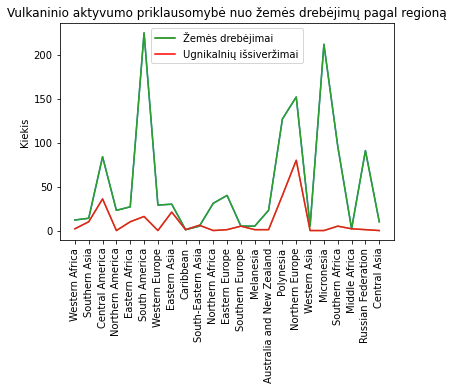

In [99]:
plt.plot(Region, join_tables) 
plt.plot(Region, join_tables) 
plt.title('Vulkaninio aktyvumo priklausomybė nuo žemės drebėjimų pagal regioną') 
plt.legend(['Žemės drebėjimai', 'Ugnikalnių išsiveržimai']) 
plt.xticks(rotation='vertical')
plt.ylabel('Kiekis') 
ax = plt.gca()
leg = ax.get_legend()
leg.legendHandles[0].set_color('green')
leg.legendHandles[1].set_color('red')

### Biologinės katastrofos vidutiniškai pareikalauja daugiausiai žmonių aukų

In [100]:
nd4 = natural_disasters

In [101]:
nd4.head(3)

,Year,Disaster_Subgroup,Disaster_Type,Disaster_Subtype,Event_Name,Country,Region,Continent,Location,Origin,Start_Year,End_Year,Total_Deaths,No_Injured,No_Affected,No_Homeless,Total_Affected
0,1900,Climatological,Drought,Drought,,Cabo Verde,Western Africa,Africa,Countrywide,,1900,1900,11000,,,,
1,1900,Climatological,Drought,Drought,,India,Southern Asia,Asia,Bengal,,1900,1900,1250000,,,,
2,1902,Geophysical,Earthquake,Ground movement,,Guatemala,Central America,Americas,"Quezaltenango, San Marcos",,1902,1902,2000,,,,


In [102]:
nd4[['Total_Deaths']] = nd4[['Total_Deaths']].apply(pd.to_numeric)

In [103]:
total_deaths = nd4.groupby('Disaster_Subgroup')['Total_Deaths'].sum().astype('int64').sort_values(ascending=False)

In [104]:
print(total_deaths)

Disaster_Subgroup
Climatological       11735106
Biological            9595358
Hydrological          7036386
Geophysical           2379962
Meteorological        1577850
Extra-terrestrial           0
Name: Total_Deaths, dtype: int64


In [105]:
total_disasters = nd4.groupby('Disaster_Subgroup')['Disaster_Subgroup'].count().sort_values(ascending=False)

In [106]:
print(total_disasters)

Disaster_Subgroup
Hydrological         5377
Meteorological       4476
Geophysical          1533
Biological           1480
Climatological       1106
Extra-terrestrial       1
Name: Disaster_Subgroup, dtype: int64


In [107]:
nd4v=nd4.groupby('Disaster_Subgroup')['Total_Deaths'].mean().sort_values(ascending=False).fillna(0).astype('int64')

In [108]:
print(nd4v)

Disaster_Subgroup
Climatological       50150
Biological            8097
Geophysical           2249
Hydrological          1734
Meteorological         470
Extra-terrestrial        0
Name: Total_Deaths, dtype: int64


AxesSubplot(0.125,0.125;0.775x0.755)


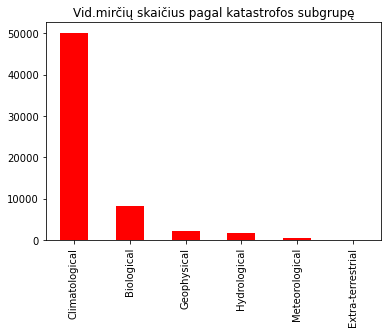

In [109]:
print(nd4v.plot.bar(x='Disaster_Subgroup', y=['nd4v'], title='Vid.mirčių skaičius pagal katastrofos subgrupę', 
                   xlabel='', color='r'))

### Ilgiau nei metus trunkančios ir mirtingiausios sausros daugiausiai įvyksta Afrikos kontinente

In [110]:
nd5 = natural_disasters

In [111]:
nd5.head(3)

,Year,Disaster_Subgroup,Disaster_Type,Disaster_Subtype,Event_Name,Country,Region,Continent,Location,Origin,Start_Year,End_Year,Total_Deaths,No_Injured,No_Affected,No_Homeless,Total_Affected
0,1900,Climatological,Drought,Drought,,Cabo Verde,Western Africa,Africa,Countrywide,,1900,1900,11000.0,,,,
1,1900,Climatological,Drought,Drought,,India,Southern Asia,Asia,Bengal,,1900,1900,1250000.0,,,,
2,1902,Geophysical,Earthquake,Ground movement,,Guatemala,Central America,Americas,"Quezaltenango, San Marcos",,1902,1902,2000.0,,,,


In [112]:
nd5[['Start_Year', 'End_Year']] = nd5[['Start_Year', 'End_Year']].apply(pd.to_numeric)

In [113]:
nd5[['Total_Deaths']] = nd5[['Total_Deaths']].apply(pd.to_numeric)

In [114]:
def drought_function():
    return nd5.loc[(nd5['Disaster_Type'] == 'Drought') &
                   ((nd5['End_Year'] - nd5['Start_Year']) > 2)]

In [115]:
drought_amount = drought_function().groupby('Continent')['Disaster_Type'].count()

In [116]:
print(drought_amount)

Continent
Africa      54
Americas     8
Asia         3
Europe       2
Oceania      1
Name: Disaster_Type, dtype: int64


In [117]:
drought_deaths = drought_function().groupby('Continent')[
                                                         'Total_Deaths'].sum().round().astype(
                                                         'int64').sort_values(ascending=False)

In [118]:
print(drought_deaths)

Continent
Africa      308285
Asia           143
Americas        12
Europe           0
Oceania          0
Name: Total_Deaths, dtype: int64


In [119]:
deaths_average = (drought_deaths/drought_amount).round().astype('int64').sort_values(ascending=False)

In [120]:
print(deaths_average)

Continent
Africa      5709
Asia          48
Americas       2
Europe         0
Oceania        0
dtype: int64


Text(0.5, 1.0, 'Mirtingumas nuo sausrų')

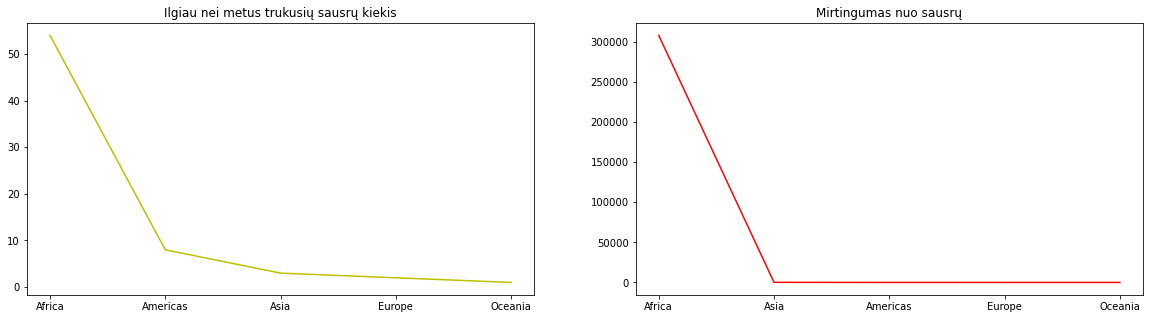

In [121]:
f = plt.figure(figsize=(20,5))
ax = f.add_subplot(121)
ax.plot(drought_amount, 'y')
plt.title('Ilgiau nei metus trukusių sausrų kiekis')
ax2 = f.add_subplot(122)
ax2.plot(drought_deaths, 'r')
plt.title('Mirtingumas nuo sausrų')

Text(0.5, 1.0, 'Vidutinis mirtingumas nuo sausrų')

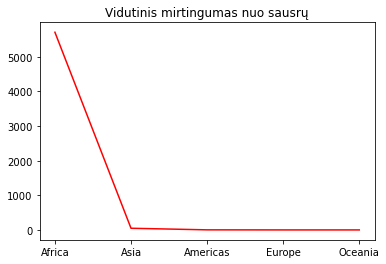

In [122]:
plt.plot(deaths_average, 'r')
plt.title('Vidutinis mirtingumas nuo sausrų')

### Natūralios katastrofos mažiausiai paveikia Europos kontinento gyventojus

In [123]:
nd6 =  natural_disasters

In [124]:
nd6.head(3)

,Year,Disaster_Subgroup,Disaster_Type,Disaster_Subtype,Event_Name,Country,Region,Continent,Location,Origin,Start_Year,End_Year,Total_Deaths,No_Injured,No_Affected,No_Homeless,Total_Affected
0,1900,Climatological,Drought,Drought,,Cabo Verde,Western Africa,Africa,Countrywide,,1900,1900,11000.0,,,,
1,1900,Climatological,Drought,Drought,,India,Southern Asia,Asia,Bengal,,1900,1900,1250000.0,,,,
2,1902,Geophysical,Earthquake,Ground movement,,Guatemala,Central America,Americas,"Quezaltenango, San Marcos",,1902,1902,2000.0,,,,


In [125]:
nd5[['Total_Affected']] = nd5[['Total_Affected']].apply(pd.to_numeric)

In [126]:
print(nd6['Total_Affected'].sum().astype('int64'))

7850922278


In [127]:
affected_people = nd6.groupby('Continent')['Total_Affected'].sum().astype('int64')

In [128]:
print(affected_people)

Continent
Africa       524530309
Americas     402414510
Asia        6830938141
Europe        68135132
Oceania       24904186
Name: Total_Affected, dtype: int64


In [129]:
disasters_amount = nd6.groupby('Continent')['Continent'].count()

In [130]:
print(disasters_amount)

Continent
Africa      2555
Americas    3476
Asia        5564
Europe      1738
Oceania      640
Name: Continent, dtype: int64


In [131]:
affected_average = (affected_people/disasters_amount).sort_values(ascending=False).astype('int64')

In [132]:
print(affected_average)

Continent
Asia        1227702
Africa       205295
Americas     115769
Europe        39203
Oceania       38912
dtype: int64


AxesSubplot(0.125,0.125;0.775x0.755)


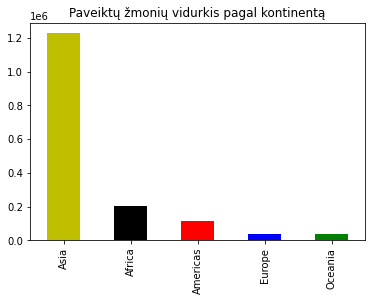

In [133]:
print(affected_average.plot.bar(x='Continent', y=['affected_average'], 
                                 title='Paveiktų žmonių vidurkis pagal kontinentą', 
                                 xlabel='', color=['y','k','r','b', 'g']))

### Bėgant metams katastrofos dažnėja

In [134]:
nd7 = natural_disasters

In [135]:
nd7.head(3)

,Year,Disaster_Subgroup,Disaster_Type,Disaster_Subtype,Event_Name,Country,Region,Continent,Location,Origin,Start_Year,End_Year,Total_Deaths,No_Injured,No_Affected,No_Homeless,Total_Affected
0,1900,Climatological,Drought,Drought,,Cabo Verde,Western Africa,Africa,Countrywide,,1900,1900,11000.0,,,,NaN
1,1900,Climatological,Drought,Drought,,India,Southern Asia,Asia,Bengal,,1900,1900,1250000.0,,,,NaN
2,1902,Geophysical,Earthquake,Ground movement,,Guatemala,Central America,Americas,"Quezaltenango, San Marcos",,1902,1902,2000.0,,,,NaN


In [136]:
nd77 = nd7.Year.value_counts().reset_index(name='Sum_of_Disasters').sort_values(by=['index'] ).astype('int64')

AxesSubplot(0.125,0.125;0.775x0.755)


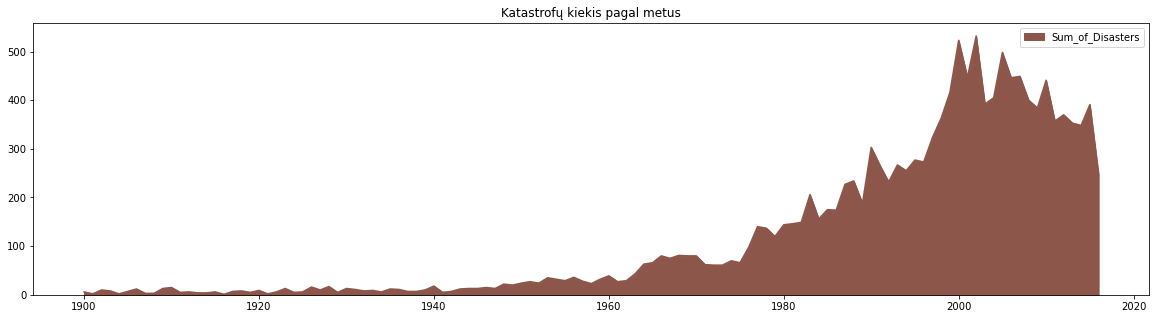

In [137]:
print(nd77.plot.area(x='index', y=['Sum_of_Disasters'], 
                            title='Katastrofų kiekis pagal metus', 
                            xlabel= '', color= 'tab:brown', figsize=(20,5)))

## Išvados

    1) Azijos kontinente iš tikrųjų įvyksta daugiausiai natūralių katastrofų.
    2) JAV, labai nežymiai aplenkus Kiniją, buvo patvirtinta, kad ją galima laikyti katastrofų ''karalienė''.
    3) Vykstant katastrofiniams žemės drebėjimams, vulkaninis aktyvumas padidėja ir to pasekoje, dažnu atveju, 
    išsiveržia ugnikalniai.
    4) Klimatologinės katastrofos vidutiniškai pareikalauja žymiai daugiau aukų nei visos kitos. Biologinės atsiduria
    antroje vietoje.
    5) Hipotezė visiškai patvirtinta. Afrika stipriai lenkia kitus kontinentus pagal ilgiau nei metus trukusių 
    sausrų vidutinį mirtingumą ir sausrų kiekį. 
    6) Natūralios katastrofos poveikis, imant paveiktų žmonių kiekį per katastrofą, mažiausias yra Okeanijoje ir
    Europoje. Daugiausiai žmonių nukenčia Azijoje. 
    7) Bėgant metams, katastrofų daugėjo, bet paskui pradėjo po truputi mažėti. Todėl teigti, kad katastrofų su 
    metais daugėja, pagal turimus duomenys, negalime.